# data preprocessing house 
Complete preprocessing workflow as requested.

##  Import Libraries and data set

In [21]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

file_path = "Housing.xls"
df = pd.read_csv(file_path)
df_original = df.copy()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4.0,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2.0,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1.0,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1.0,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400.0,3,1.0,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620.0,2,1.0,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910.0,3,1.0,1,no,no,no,no,no,0,no,furnished


## Step 1 – Statistical Summary of Numerical Variables 

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols].describe(percentiles=[0.01, .05, .10, .25, .5, .75, .90, .95, .99])

summary_stats = df[numeric_cols].describe().T
summary_stats["median"] = df[numeric_cols].median()
summary_stats["skew"] = df[numeric_cols].skew()
summary_stats["kurtosis"] = df[numeric_cols].kurtosis()
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,skew,kurtosis
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,4340000.0,1.212239,1.960130
area,542.0,5.127168e+03,2.143733e+03,1650.0,3588.0,4540.0,6360.0,16200.0,4540.0,1.308216,2.755046
bedrooms,545.0,3.691743e+00,1.702314e+01,1.0,2.0,3.0,3.0,400.0,3.0,23.279477,542.949099
bathrooms,544.0,1.284926e+00,5.019967e-01,1.0,1.0,1.0,2.0,4.0,1.0,1.599262,2.203253
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0,2.0,1.082088,0.679404
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0,0.0,0.842062,-0.573063


## Step 2 – Handling Missing Values 

In [23]:
df2 = df.copy()

for col in df2.columns:
    if df2[col].isnull().sum() == 0:
        continue
    if df2[col].dtype in ['int64','float64']:
        if abs(df2[col].skew()) > 1:
            df2[col] = df2[col].fillna(df2[col].median())
        else:
            df2[col] = df2[col].fillna(df2[col].mean())
    else:
        df2[col] = df2[col].fillna(df2[col].mode()[0])

df2.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [25]:
# Show duplicate rows
duplicates = df2[df2.duplicated(keep=False)]  # keep=False marks all duplicates as True
print(duplicates)
# Rows that were removed
removed = df2[~df2.index.isin(df3.index)]
print(removed)


Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


## Step 3 – Detecting and Handling Duplicate Records 

In [26]:
df3 = df2.drop_duplicates().reset_index(drop=True)
df3.shape

(545, 13)

## Step 4 – Detecting and Handling Data Inconsistency 

In [9]:
df4 = df3.copy()

for col in df4.select_dtypes(include="object"):
    df4[col] = df4[col].astype(str).str.strip()
    df4[col] = df4[col].replace({"N/A":np.nan, "NA":np.nan, "None":np.nan})

for col in df4.select_dtypes(include="object"):
    sample = df4[col].dropna().astype(str).head(50)
    num_like = sample.str.replace(',','').str.replace('$','').str.replace('.','').str.isdigit()
    if num_like.mean() > 0.6:
        df4[col] = df4[col].str.replace(',','').str.replace('$','')
        df4[col] = pd.to_numeric(df4[col], errors="coerce")

df4.dtypes

price                 int64
area                float64
bedrooms              int64
bathrooms           float64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

## Step 5 – Detecting and Handling Outliers

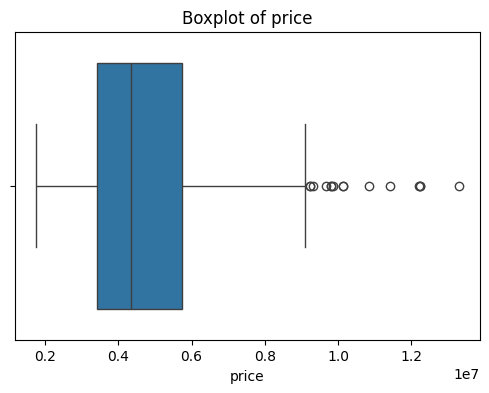

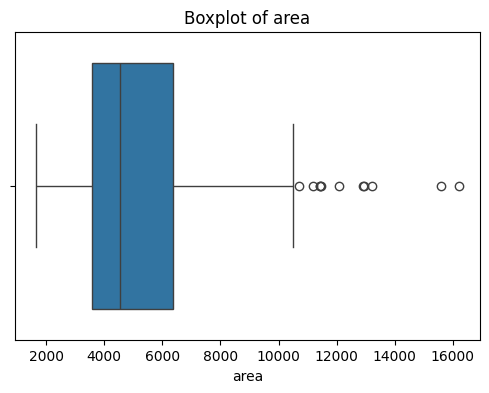

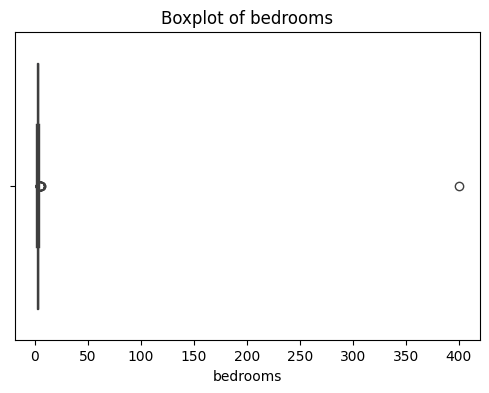

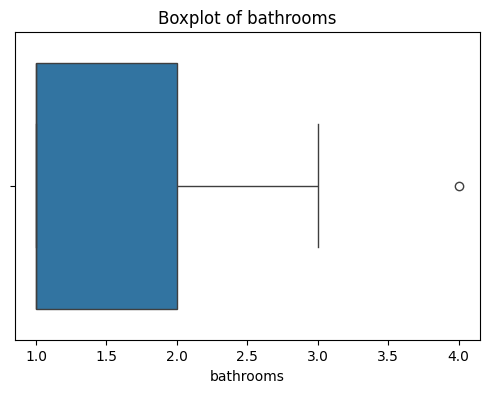

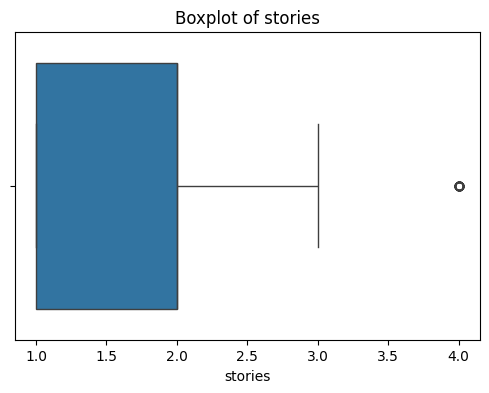

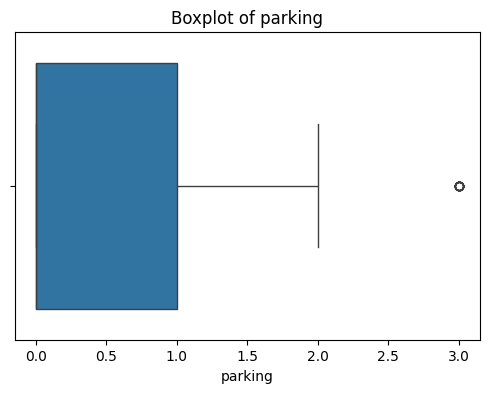

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

## Step 6 – Normalization and Scaling 

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df6 = df5.copy()
numeric_cols = df6.select_dtypes(include=[np.number]).columns

scalers = {
    "std": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler()
}

for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df6[numeric_cols])
    scaled_df = pd.DataFrame(scaled, columns=[f"{c}_{name}" for c in numeric_cols])
    df6 = pd.concat([df6, scaled_df], axis=1)

df6.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,bedrooms_minmax,bathrooms_minmax,stories_minmax,parking_minmax,price_robust,area_robust,bedrooms_robust,bathrooms_robust,stories_robust,parking_robust
0,10542000.0,7420.0,4,2.0,3,yes,no,no,no,yes,...,0.666667,0.5,0.666667,0.666667,2.684848,1.043478,1.0,1.0,1.0,2.0
1,10542000.0,8960.0,4,3.0,4,yes,no,no,no,yes,...,0.666667,1.0,1.000000,1.000000,2.684848,1.601449,1.0,2.0,2.0,3.0
2,10542000.0,9960.0,3,2.0,2,yes,no,yes,no,no,...,0.333333,0.5,0.333333,0.666667,2.684848,1.963768,0.0,1.0,0.0,2.0
3,10542000.0,4540.0,4,2.0,2,yes,no,yes,no,yes,...,0.666667,0.5,0.333333,1.000000,2.684848,0.000000,1.0,1.0,0.0,3.0
4,10542000.0,4540.0,4,1.0,2,yes,yes,yes,no,yes,...,0.666667,0.0,0.333333,0.666667,2.684848,0.000000,1.0,0.0,0.0,2.0


## Step 7 – Encoding

In [12]:
cat_cols = df6.select_dtypes(include="object").columns.tolist()
df7 = df6.copy()

# Label encoding
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    if df7[col].nunique() == 2:
        df7[col+"_label"] = LabelEncoder().fit_transform(df7[col])

# One-hot
for col in cat_cols:
    if 2 < df7[col].nunique() <= 10:
        df7 = pd.concat([df7, pd.get_dummies(df7[col], prefix=col)], axis=1)

# Binary encoding
def binary_hash_encoder(series, n_bits=8):
    hashed = series.fillna("NA").apply(lambda x: abs(hash(x)) % (2**n_bits))
    bin_df = hashed.apply(lambda x: list(map(int,list(f"{x:0{n_bits}b}"))))
    return pd.DataFrame(bin_df.tolist(),
                        columns=[f"{series.name}_bit_{i}" for i in range(n_bits)])

for col in cat_cols:
    if 10 < df7[col].nunique() <= 50:
        df7 = pd.concat([df7, binary_hash_encoder(df7[col])], axis=1)

# Ordinal encoding
ordinal_columns = [c for c in cat_cols if any(x in c.lower() 
                                              for x in ['level','rating','quality','grade'])]
for col in ordinal_columns:
    mapping = {cat: i for i, cat in enumerate(sorted(df7[col].dropna().unique()))}
    df7[col+"_ord"] = df7[col].map(mapping)

# Target encoding
target = "price"

def target_encode(df, column, target, smoothing=10):
    agg = df.groupby(column)[target].agg(['mean','count'])
    global_mean = df[target].mean()
    agg["smooth"] = (agg["count"]*agg["mean"] + smoothing*global_mean) / (agg["count"] + smoothing)
    return df[column].map(agg["smooth"])

for col in cat_cols:
    if df7[col].nunique() > 1:
        df7[col + "_target"] = target_encode(df7, col, target)

df7.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_target,guestroom_target,basement_target,hotwaterheating_target,airconditioning_target,prefarea_target,furnishingstatus_target
0,10542000.0,7420.0,4,2.0,3,yes,no,no,no,yes,...,True,False,False,4.968476e+06,4.532409e+06,4.505641e+06,4.712995e+06,5.903684e+06,5.750596e+06,5.400149e+06
1,10542000.0,8960.0,4,3.0,4,yes,no,no,no,yes,...,True,False,False,4.968476e+06,4.532409e+06,4.505641e+06,4.712995e+06,5.903684e+06,4.428139e+06,5.400149e+06
2,10542000.0,9960.0,3,2.0,2,yes,no,yes,no,no,...,False,True,False,4.968476e+06,4.532409e+06,5.195743e+06,4.712995e+06,4.203465e+06,5.750596e+06,4.892855e+06
3,10542000.0,4540.0,4,2.0,2,yes,no,yes,no,yes,...,True,False,False,4.968476e+06,4.532409e+06,5.195743e+06,4.712995e+06,5.903684e+06,5.750596e+06,5.400149e+06
4,10542000.0,4540.0,4,1.0,2,yes,yes,yes,no,yes,...,True,False,False,4.968476e+06,5.687425e+06,5.195743e+06,4.712995e+06,5.903684e+06,4.428139e+06,5.400149e+06


## Step 8 – Save Output

In [33]:
import os

# Create folder if it doesn't exist
save_folder = r'F:\Amasomo\Machine Learning\assignment2'
os.makedirs(save_folder, exist_ok=True)

# Define full path for cleaned dataset
cleaned_path = os.path.join(save_folder, 'house_cleaned.csv')  # CSV file

# Save the dataset
df_final.to_csv(cleaned_path, index=False)
print('Cleaned dataset saved to:', cleaned_path)


NameError: name 'df_final' is not defined

In [14]:
import os
os.path.expanduser("~")


'C:\\Users\\MIUS'